In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Unzip the  dataset
 !unzip "/content/drive/My Drive/AI_Data/DataQ.zip"

Archive:  /content/drive/My Drive/AI_Data/DataQ.zip
   creating: Data/Cherry/
  inflating: Data/Cherry/3_100.jpg   
  inflating: Data/Cherry/32_100.jpg  
  inflating: Data/Cherry/33_100.jpg  
  inflating: Data/Cherry/34_100.jpg  
  inflating: Data/Cherry/35_100.jpg  
  inflating: Data/Cherry/36_100.jpg  
  inflating: Data/Cherry/37_100.jpg  
  inflating: Data/Cherry/38_100.jpg  
  inflating: Data/Cherry/39_100.jpg  
  inflating: Data/Cherry/4_100.jpg   
  inflating: Data/Cherry/40_100.jpg  
  inflating: Data/Cherry/41_100.jpg  
  inflating: Data/Cherry/42_100.jpg  
  inflating: Data/Cherry/43_100.jpg  
  inflating: Data/Cherry/44_100.jpg  
  inflating: Data/Cherry/45_100.jpg  
  inflating: Data/Cherry/46_100.jpg  
  inflating: Data/Cherry/47_100.jpg  
  inflating: Data/Cherry/48_100.jpg  
  inflating: Data/Cherry/49_100.jpg  
  inflating: Data/Cherry/5_100.jpg   
  inflating: Data/Cherry/50_100.jpg  
  inflating: Data/Cherry/51_100.jpg  
  inflating: Data/Cherry/52_100.jpg  
  inflatin

Copying files: 153 files [00:00, 4711.59 files/s]


Found 117 images belonging to 3 classes.
Found 33 images belonging to 3 classes.
Epoch 1/10
20/19 [==============================] - 8s 383ms/step - loss: 0.3764 - acc: 0.9067 - val_loss: 4.5418e-05 - val_acc: 1.0000
Epoch 2/10
20/19 [==============================] - 6s 322ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 4.5138e-06 - val_acc: 1.0000
Epoch 3/10
20/19 [==============================] - 6s 322ms/step - loss: 9.6498e-04 - acc: 1.0000 - val_loss: 1.5804e-06 - val_acc: 1.0000
Epoch 4/10
20/19 [==============================] - 7s 327ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 6.4662e-07 - val_acc: 1.0000
Epoch 5/10
20/19 [==============================] - 7s 327ms/step - loss: 2.3899e-04 - acc: 1.0000 - val_loss: 3.0525e-07 - val_acc: 1.0000
Epoch 6/10
20/19 [==============================] - 6s 322ms/step - loss: 3.5325e-04 - acc: 1.0000 - val_loss: 2.4022e-07 - val_acc: 1.0000
Epoch 7/10
20/19 [==============================] - 6s 322ms/step - loss: 9.0934e-05 - acc:

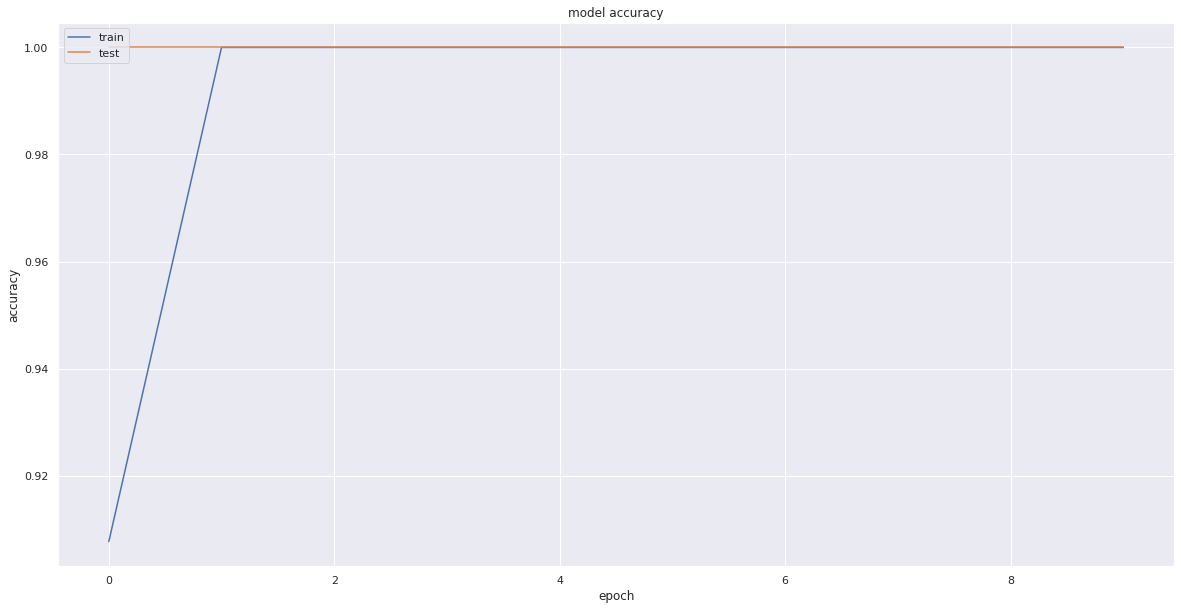

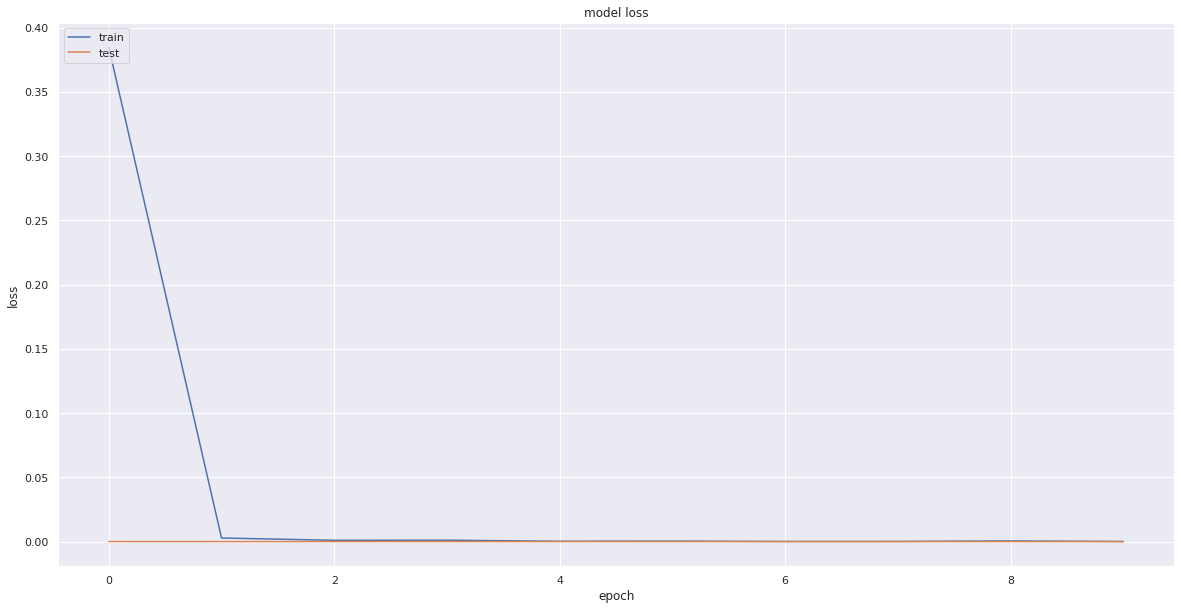

In [7]:
#Model : 1
!pip install split_folders tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
 


# split Dataset folder into train and val folders
import split_folders
split_folders.ratio('/content/Data', output="data", seed=1337, ratio=(.8, .2))



def create_model(p,input_shape):
    # Initialising the CNN
    model = Sequential()
    # Convolution + Pooling Layer 
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
   
    # Convolution + Pooling Layer 
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
   
    # Convolution + Pooling Layer 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Convolution + Pooling Layer 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flattening
    model.add(Flatten())
    
    # Fully connection
    model.add(Dropout(p))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(p/2))
    model.add(Dense(3, activation='softmax'))
    
    # Compiling the CNN
    optimizer = Adam(lr=1e-3)
    metrics=['accuracy']
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=metrics)
    return model


# Train the model with  ImageDataGenerator (data augmentation)

bs = 32       # batch_size- Higer the value less time for training  
epochs = 10  #given the batch size, 100 epochs is optimum
height = 64   #image dimensions
width = 64

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/data/train',
                                             target_size = (height, width),
                                             batch_size = bs,
                                             class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/data/val',
                                        target_size = (height, width),
                                        batch_size = bs,
                                        class_mode = 'categorical')


model = create_model(p=0.5,input_shape=(height, width,3))                                

# store model metrics

History = model.fit_generator(training_set,
                     steps_per_epoch=627/bs,
                     epochs = epochs,
                     validation_data = test_set,
                     validation_steps = 161/bs)


# Model metrics visualization 

plt.figure(figsize = (20,10))

# summarize history for accuracy
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.figure(figsize = (20,10))

# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#save model
model.save('model.h5')

In [0]:
from keras.models import load_model
import cv2
import numpy as np

# Make predictions


def predict(model_path,img_path ):
  #load model
  model = load_model(model_path)

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  img = cv2.imread(img_path)
  img = cv2.resize(img,(64,64),interpolation=cv2.INTER_LINEAR)
  img = np.reshape(img,[1,64,64,3])

  classes = model.predict_classes(img)
  if classes[0][0][0] == 0:
      prediction = 'Cherry'
  elif classes[0][1][0] == 1:
      prediction = 'Cocos'
  else:
      prediction = 'Dates'

  #visualize output 
  plt.figure(figsize = (20,10))
  im = cv2.imread(img_path)
  im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
  plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
  plt.title(prediction)
  plt.show()


In [9]:
img_path = '/content/drive/My Drive/AI_Data/316_100.jpg'
model_path = '/content/model.h5'

predict(model_path,img_path )

IndexError: ignored